<a href="https://colab.research.google.com/github/MauricioClaudio/DATA621/blob/main/DATA_621_MARR_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DATA 621: Suggested exercises - MARR 5.1**

### **CLAUDIO, Mauricio**

### **2022-02-28**


---



**1. ... Quick Stab Collection Agency (QSCA) is a bill-collecting agency that specializes in collecting small accounts. To distinguish itself from competing collection agencies, the company wants to establish a reputation for collecting delinquent accounts quickly. The marketing department has just suggested that QSCA adopt the slogan: Under 60 days or your money back!!!!...In this data set, the variable LATE is the number of days the payment is overdue, BILL is the amount of the overdue bill in dollars...Develop a regression model to predict LATE from BILL.**

Let's load, glimpse the data and plot the two variables.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 96
Columns: 2
$ LATE <int> 16, 47, 22, 47, 47, 21, 44, 27, 19, 48, 16, 50, 11, 17, 25, 37, 2…
$ BILL <int> 79, 264, 97, 289, 288, 100, 250, 140, 97, 299, 80, 311, 46, 110, …


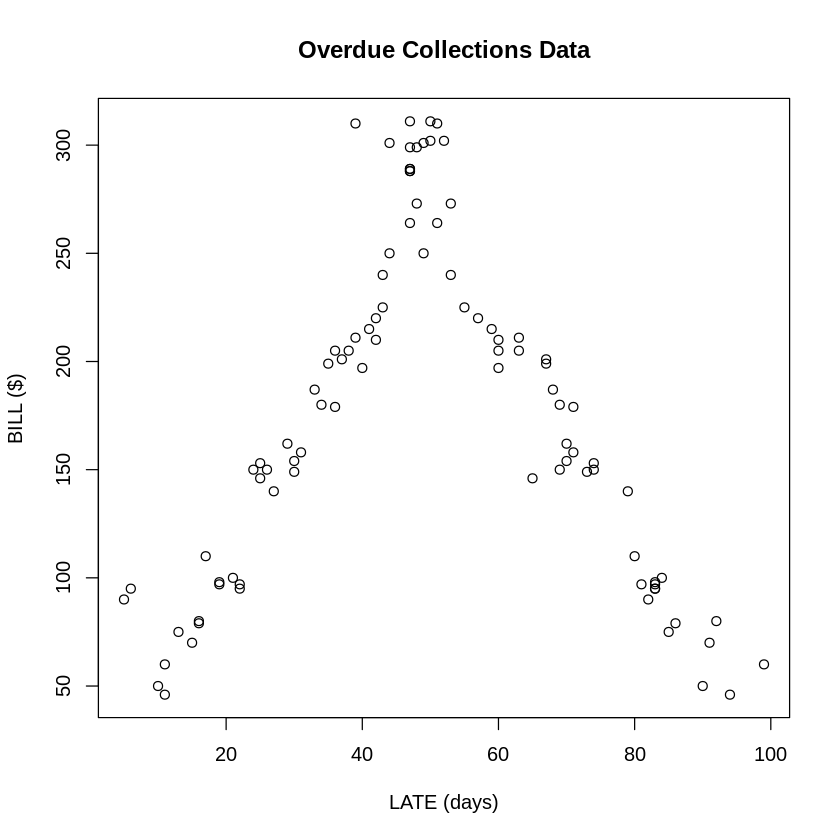

In [1]:
library(dplyr)
overdue = read.csv('http://gattonweb.uky.edu/sheather/book/docs/datasets/overdue.txt',
                   sep='')
glimpse(overdue)
plot(overdue$LATE,overdue$BILL,
     main="Overdue Collections Data",
     xlab="LATE (days)",
     ylab="BILL ($)")

Well, obviously a single linear model is not going to work. We need either a non-linear model or two separate linear models. Let's slice the data into two, a residential and a commercial data set, and print separate scatter plots for each.

Rows: 48
Columns: 2
$ LATE <int> 16, 47, 22, 47, 47, 21, 44, 27, 19, 48, 16, 50, 11, 17, 25, 37, 2…
$ BILL <int> 79, 264, 97, 289, 288, 100, 250, 140, 97, 299, 80, 311, 46, 110, …
Rows: 48
Columns: 2
$ LATE <int> 74, 47, 39, 47, 53, 71, 82, 83, 90, 92, 71, 80, 83, 57, 84, 63, 7…
$ BILL <int> 150, 289, 310, 299, 240, 179, 90, 95, 50, 80, 158, 110, 95, 220, …


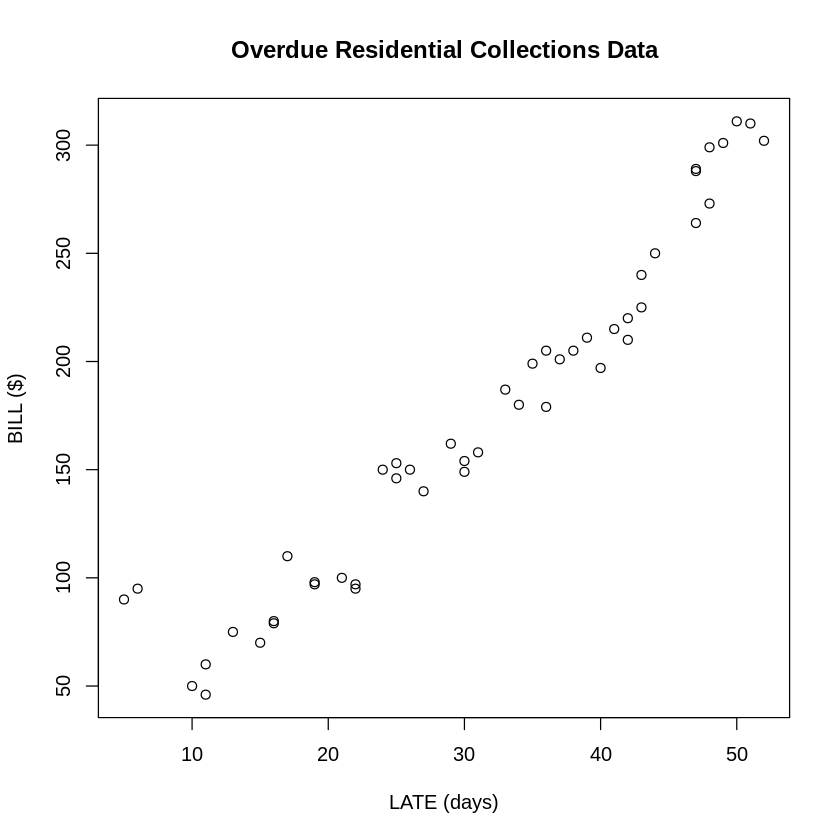

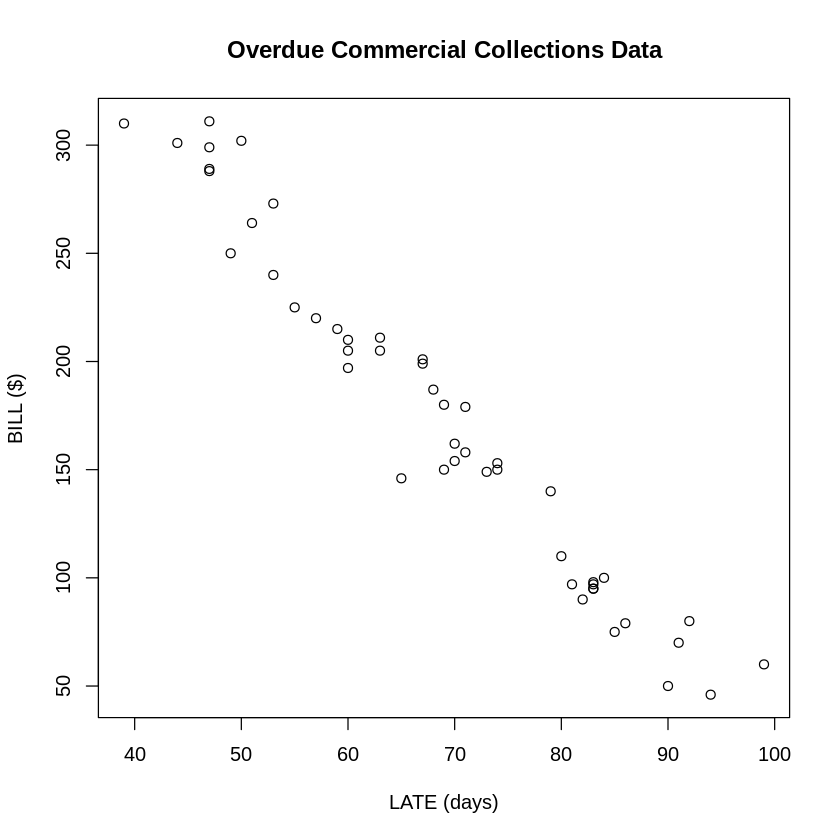

In [2]:
overdue.res = overdue[1:48,]
glimpse(overdue.res)
plot(overdue.res$LATE,
     overdue.res$BILL,
     main="Overdue Residential Collections Data",
     xlab="LATE (days)",
     ylab="BILL ($)")

overdue.com = overdue[49:96,]
glimpse(overdue.com)
plot(overdue.com$LATE,
     overdue.com$BILL,
     main="Overdue Commercial Collections Data",
     xlab="LATE (days)",
     ylab="BILL ($)")

That's much better. We'll opt for two separate linear models, one for residential and another for commercial customers. Let's build the two models, print their summary statistics and diagnostic plots.


Call:
lm(formula = LATE ~ BILL, data = overdue.res)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.1211  -1.4585   0.5562   2.0311   5.1508 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.209624   1.249749   1.768   0.0837 .  
BILL        0.165683   0.006554  25.281   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.515 on 46 degrees of freedom
Multiple R-squared:  0.9329,	Adjusted R-squared:  0.9314 
F-statistic: 639.1 on 1 and 46 DF,  p-value: < 2.2e-16


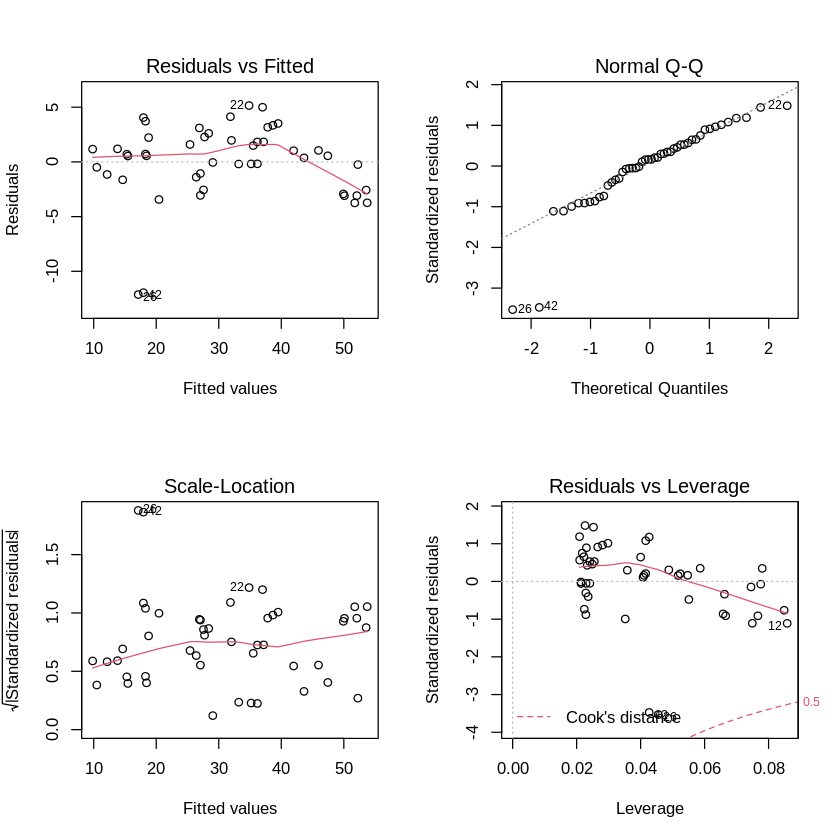

In [6]:
# Residential data
res.mod = lm(LATE ~ BILL, data = overdue.res)
summary(res.mod)
par(mfrow=c(2,2))
plot(res.mod)


Call:
lm(formula = LATE ~ BILL, data = overdue.com)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8778 -2.2637 -0.2918  1.6991  8.6995 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 101.758184   1.144967   88.87   <2e-16 ***
BILL         -0.190961   0.006004  -31.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.22 on 46 degrees of freedom
Multiple R-squared:  0.9565,	Adjusted R-squared:  0.9556 
F-statistic:  1012 on 1 and 46 DF,  p-value: < 2.2e-16


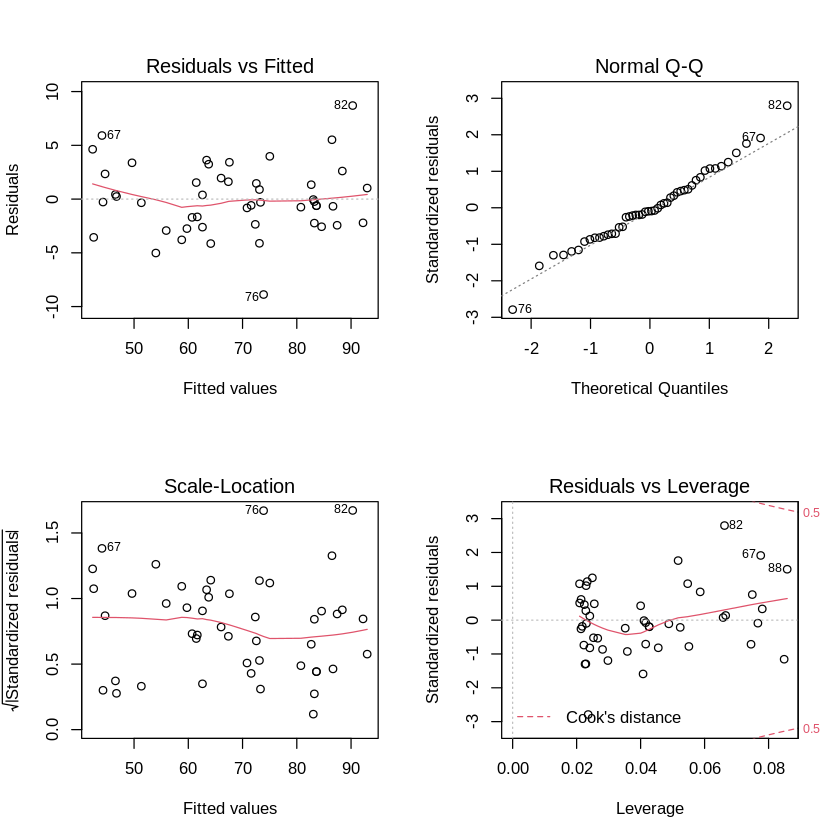

In [8]:
# Commercial data
com.mod = lm(LATE ~ BILL, data = overdue.com)
summary(com.mod)
par(mfrow=c(2,2))
plot(com.mod)

We note that the Intercept is not significant at 95% confidence for the residential data. We also note the presence of a few outliers which may be degrading our model(s). A next step would be to investigate these outliers. Finally, in the bigger picture we see that we need to deal with the collection of arrears differently for commercial and residential customers.